# Explore SDXL-base-v1 and SD-base-v2

In [1]:
from diffusers import UNet2DConditionModel

In [21]:
unet = UNet2DConditionModel.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", subfolder="unet", cache_dir="/root/dataset_sj/hf_cache"
)

In [22]:
unet.train();

In [23]:
model_size = 0
for param in unet.parameters():
    model_size += param.data.nelement()
print(model_size)

2567463684


In [24]:
unet.encoder_hid_dim_type

/tmp/ipykernel_1168129/3803780671.py:1: FutureWarning: Accessing config attribute `encoder_hid_dim_type` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'encoder_hid_dim_type' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.encoder_hid_dim_type'.
  unet.encoder_hid_dim_type


In [3]:
unet = UNet2DConditionModel.from_pretrained(
    "stabilityai/stable-diffusion-2-base", subfolder="unet"
)

In [26]:
unet.train();

In [27]:
model_size = 0
for param in unet.parameters():
    model_size += param.data.nelement()
print(model_size)

865910724


In [31]:
unet.addition_embed_type is None

/tmp/ipykernel_1168129/3846282527.py:1: FutureWarning: Accessing config attribute `addition_embed_type` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'addition_embed_type' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.addition_embed_type'.
  unet.addition_embed_type is None


True

In [8]:
import os

os.chdir("/root/dev/T2STD")
os.getcwd()

'/root/dev/T2STD'

In [23]:
import yaml

from model.TSD.text_encoder import FrozenCLIPTextEmbedder
from jjuke.net_utils.options import instantiate_from_config

conditioner_config = '''
    target: model.TripLoRA.text_encoder.FrozenCLIPTextEmbedder
    params:
      pretrained_model_name_or_path: "stabilityai/stable-diffusion-2-base"
    cond_forward: False
'''
conditioner_config = yaml.safe_load(conditioner_config)

cond_model = instantiate_from_config(conditioner_config).cpu()

In [16]:
from transformers import CLIPTokenizer

tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path="stabilityai/stable-diffusion-2-base",
    subfolder="tokenizer"
)

In [18]:
text = "a chair"
input_ids = tokenizer(
    text,
    padding="do_not_pad",
    truncation=True,
    max_length=tokenizer.model_max_length
).input_ids
input_ids = tokenizer.pad(
    {"input_ids": input_ids},
    padding="max_length",
    max_length=tokenizer.model_max_length,
    return_tensors="pt"
).input_ids

In [27]:
cond = cond_model(input_ids[None])

In [31]:
import torch

img_latent = unet(torch.rand(1, 4, 32, 32), 0, cond, None).sample

In [32]:
img_latent.shape

torch.Size([1, 4, 32, 32])

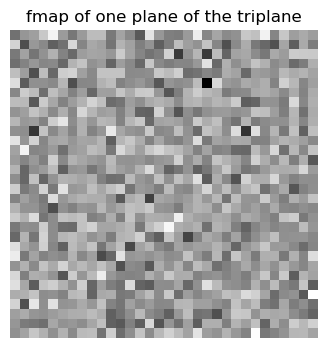

In [38]:
from util.plot import plot_triplane_channel
plot_triplane_channel(img_latent[0].detach().cpu().numpy(), num_planes=1, title="img_latent", save_path=None)